In [1]:
# Import libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('severe_weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LABEL     300 non-null    object
 1   Date      300 non-null    object
 2   Source    300 non-null    object
 3   Title     300 non-null    object
 4   Headline  299 non-null    object
dtypes: object(5)
memory usage: 11.8+ KB


In [3]:
df.head()

,LABEL,Date,Source,Title,Headline
0,wildfire,7/15/2023,Lifehacker.com,Use This Phone Number to Find a Cooling Center...,even full month into summer much United States...
1,wildfire,7/28/2023,BBC News,Italy Drone spots suspected wildfire arsonist,detained Italy after seen scene wildfire Calabria
2,wildfire,7/30/2023,BBC News,Canada wildfire Firefighter dies tackling Brit...,evacuation order place towns near border fires...
3,wildfire,7/18/2023,Google News,Wildfire rages near Athens Reuters,Wildfire rages near Athens Reuters
4,wildfire,7/23/2023,Google News,Jet TUI cancel flights to Rhodes because of wi...,cancel flights Rhodes because wildfire Reuters


In [4]:
print(df['LABEL'].unique())

['wildfire' 'Heatwave' 'Droughts']


In [5]:
def preprocess_text(text, remove_words=None):
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^\w\s]|[\d]', '', text)
    
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Remove specific words if provided
    if remove_words:
        filtered_tokens = [word for word in filtered_tokens if word not in remove_words]
    
    # Join the tokens back into a single string
    processed_text = ' '.join(filtered_tokens)

    return processed_text

C:\Users\sinti\AppData\Local\Temp\ipykernel_18152\1294710742.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildfire_df['wildfire_processed'] = wildfire_df['Headline'].apply(preprocess_text)


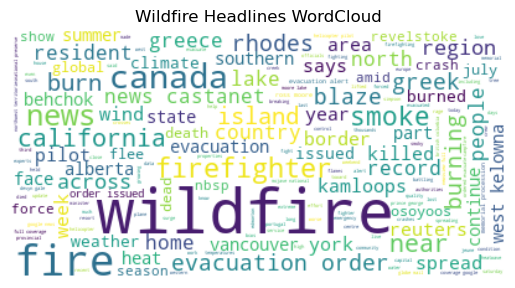

In [6]:
# Wildfire WordCloud'

import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud 

#Subsetting the data for wildfire topic
wildfire_df = df.loc[df['LABEL'] == 'wildfire']
                            
# Preprocess the 'Sentiment' column and removing custome words like "nan"
wildfire_df['wildfire_processed'] = wildfire_df['Headline'].apply(preprocess_text)


wildfire_text = wildfire_df['wildfire_processed'].astype(str)
with open('wildfire_text.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(wildfire_text))

# Read the text data from the saved text file
with open('wildfire_text.txt', 'r', encoding='utf-8') as file:
    wildfire_text = file.read()

# Create and generate a word cloud image for 'Sentiment' column
wordcloud_wildfire = WordCloud(max_font_size=50, max_words=300, 
                                    background_color="white").generate(wildfire_text)

# Display the generated image
plt.imshow(wordcloud_wildfire, interpolation='bilinear')
plt.axis("off")
plt.title('Wildfire Headlines WordCloud')
plt.show()

C:\Users\sinti\AppData\Local\Temp\ipykernel_16464\561720577.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatwave_df['heatwave_processed'] = heatwave_df['Headline'].apply(preprocess_text)


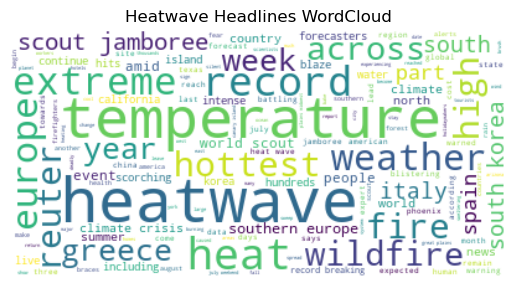

In [8]:
# Heatwave WordCloud'

import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud 

#Subsetting the data for wildfire topic
heatwave_df = df.loc[df['LABEL'] == 'Heatwave']
                            
# Preprocess the 'Headline' column 
heatwave_df['heatwave_processed'] = heatwave_df['Headline'].apply(preprocess_text)


heatwave_text = heatwave_df['heatwave_processed'].astype(str)
with open('heatwave_text.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(heatwave_text))

# Read the text data from the saved text file
with open('heatwave_text.txt', 'r', encoding='utf-8') as file:
    heatwave_text = file.read()

# Create and generate a word cloud image for 'Heaadline' column
wordcloud_heatwave = WordCloud(max_font_size=50, max_words=300, 
                                    background_color="white").generate(heatwave_text)

# Display the generated image
plt.imshow(wordcloud_heatwave, interpolation='bilinear')
plt.axis("off")
plt.title('Heatwave Headlines WordCloud')
plt.show()

C:\Users\sinti\AppData\Local\Temp\ipykernel_16464\1791784005.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drought_df['drought_processed'] = drought_df['Headline'].apply(preprocess_text)


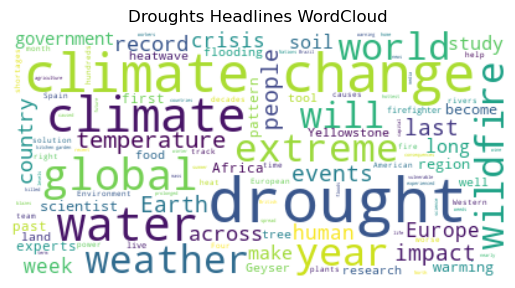

In [13]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

# # Define the preprocess_text function (assuming you have one)
# # Define the preprocess_text function (assuming you have one)
def preprocess_text(text):
     # Implement your text preprocessing logic here
        return text
# df = pd.read_csv('severe_weather.csv')
# # Subsetting the data for drought topic
# drought_df = df.loc[df['LABEL'] == 'Droughts']

# drought_df['Headline'] = drought_df['Headline'].fillna(0)
drought_df = df.loc[df['LABEL'] == 'Droughts']
# Preprocess the 'Headline' column
drought_df['drought_processed'] = drought_df['Headline'].apply(preprocess_text)

drought_text = drought_df['drought_processed'].astype(str)

with open('drought_text.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(drought_text))

# Read the text data from the saved text file
with open('drought_text.txt', 'r', encoding='utf-8') as file:
    drought_text = file.read()

# Create and generate a word cloud image for 'Headline' column
wordcloud_drought = WordCloud(max_font_size=50, max_words=300, background_color="white").generate(drought_text)

# Display the generated image
plt.imshow(wordcloud_drought, interpolation='bilinear')
plt.axis("off")
plt.title('Droughts Headlines WordCloud')
plt.show()


In [63]:
df = pd.read_csv('severe_weather.csv')
df.isna().sum()

LABEL       0
Date        0
Source      0
Title       0
Headline    1
dtype: int64

In [64]:
df = df.dropna()

In [65]:
                           
# Preprocess the 'Headline' column and removing custome words like "nan"
df['df_processed'] = df['Headline'].apply(preprocess_text)


In [66]:
df.tail()

,LABEL,Date,Source,Title,Headline,df_processed
295,Droughts,7/20/2023,Forbes,Rivers As Weapons Of War And Warnings Of Clima...,millennia armies have used rivers weapons Whil...,millennia armies used rivers weapons intention...
296,Droughts,7/21/2023,Science Daily,Climate science is catching up to climate chan...,Africa climate change impacts experienced extr...,africa climate change impacts experienced extr...
297,Droughts,7/15/2023,Home.blog,Loops and Arcs,Here tools been using lately better understand...,tools using lately better understand functiona...
298,Droughts,7/24/2023,Phys.Org,Algeria fires fanned by winds extreme heat kill,Wildfires raging across Algeria during blister...,wildfires raging across algeria blistering hea...
299,Droughts,8/3/2023,Phys.Org,Geostationary satellite reveals widespread mid...,western particularly Southwest experienced not...,western particularly southwest experienced not...


#### Data Exploration

<Figure size 1200x800 with 0 Axes>

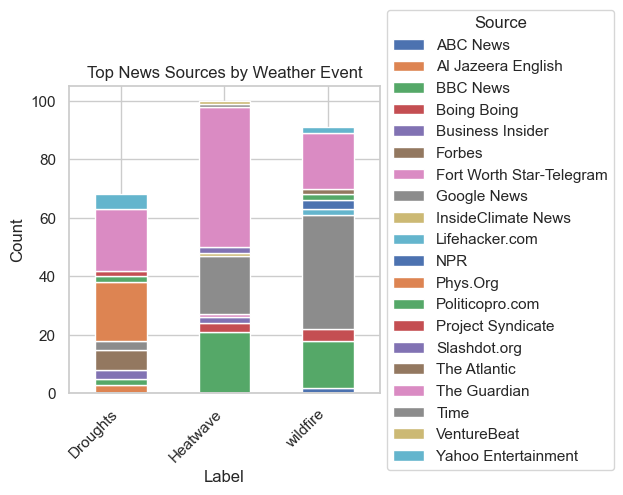

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('severe_weather.csv')

# Group by LABEL and Source, then get the count of occurrences
source_counts = df.groupby(['LABEL', 'Source']).size().reset_index(name='Count')

# Get the top 10 sources for each label
top_sources_per_label = source_counts.groupby('LABEL').apply(lambda group: group.nlargest(10, 'Count')).reset_index(drop=True)

# Pivot the data to get a clearer format for visualization
pivot_data = top_sources_per_label.pivot_table(index='LABEL', columns='Source', values='Count', fill_value=0)

# Plot a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Top News Sources by Weather Event')
plt.legend(title='Source', loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

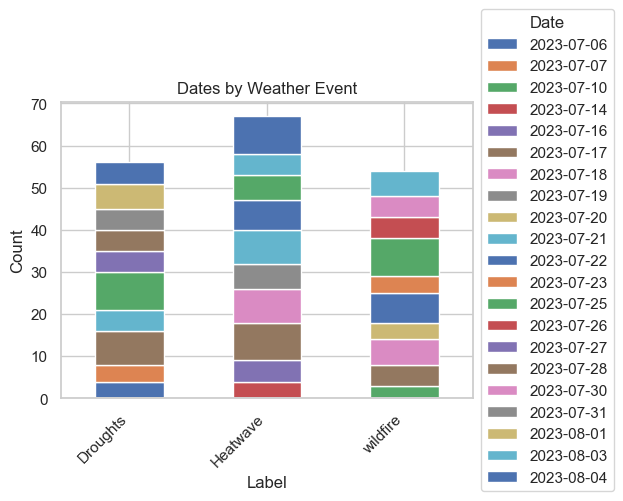

In [56]:

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Group by LABEL and Date, then get the count of occurrences
date_counts = df.groupby(['LABEL', 'Date']).size().reset_index(name='Count')

# Get the top 10 dates by count for each label
top_dates_per_label = date_counts.groupby('LABEL').apply(lambda group: group.nlargest(10, 'Count')).reset_index(drop=True)

# Pivot the data to get a clearer format for visualization
pivot_data = top_dates_per_label.pivot_table(index='LABEL', columns='Date', values='Count', fill_value=0)

# Plot a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Dates by Weather Event')
plt.legend(title='Date', loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [53]:
import pandas as pd
import spacy
import spacy.cli
from spacy import displacy

df = pd.read_csv('severe_weather.csv')

# Download and install the spaCy model
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")


# Function to extract locations
def extract_locations(text):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    return locations

# Apply the function to the DataFrame
df['Locations'] = df['Title'].apply(extract_locations)

df.head()


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


,LABEL,Date,Source,Title,Headline,Locations
0,wildfire,7/15/2023,Lifehacker.com,Use This Phone Number to Find a Cooling Center...,even full month into summer much United States...,[]
1,wildfire,7/28/2023,BBC News,Italy Drone spots suspected wildfire arsonist,detained Italy after seen scene wildfire Calabria,[]
2,wildfire,7/30/2023,BBC News,Canada wildfire Firefighter dies tackling Brit...,evacuation order place towns near border fires...,"[Canada, British Columbia]"
3,wildfire,7/18/2023,Google News,Wildfire rages near Athens Reuters,Wildfire rages near Athens Reuters,[Wildfire]
4,wildfire,7/23/2023,Google News,Jet TUI cancel flights to Rhodes because of wi...,cancel flights Rhodes because wildfire Reuters,[]


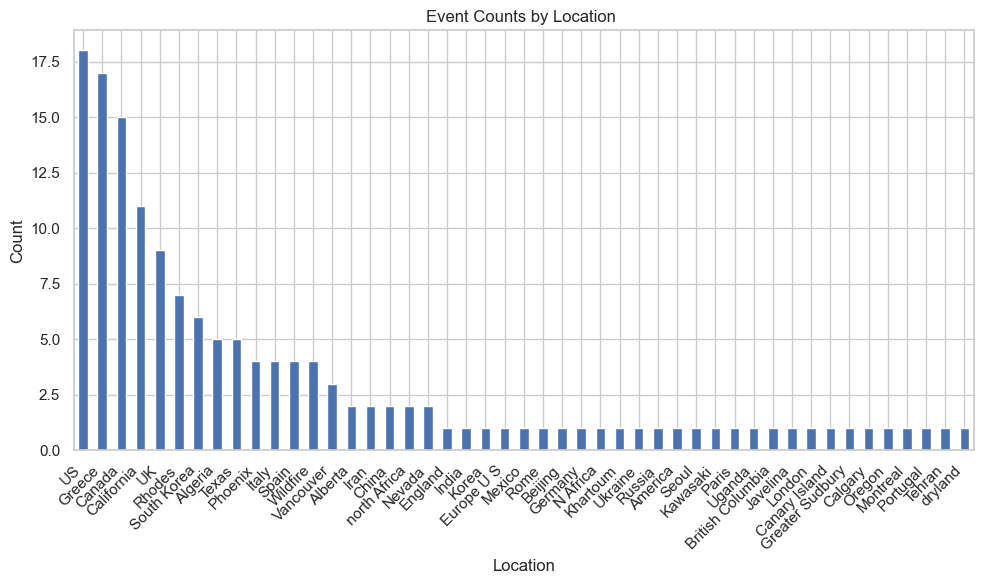

In [54]:
import pandas as pd
import matplotlib.pyplot as plt


# Flatten the list of locations and count occurrences
location_counts = df['Locations'].explode().value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Event Counts by Location ')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


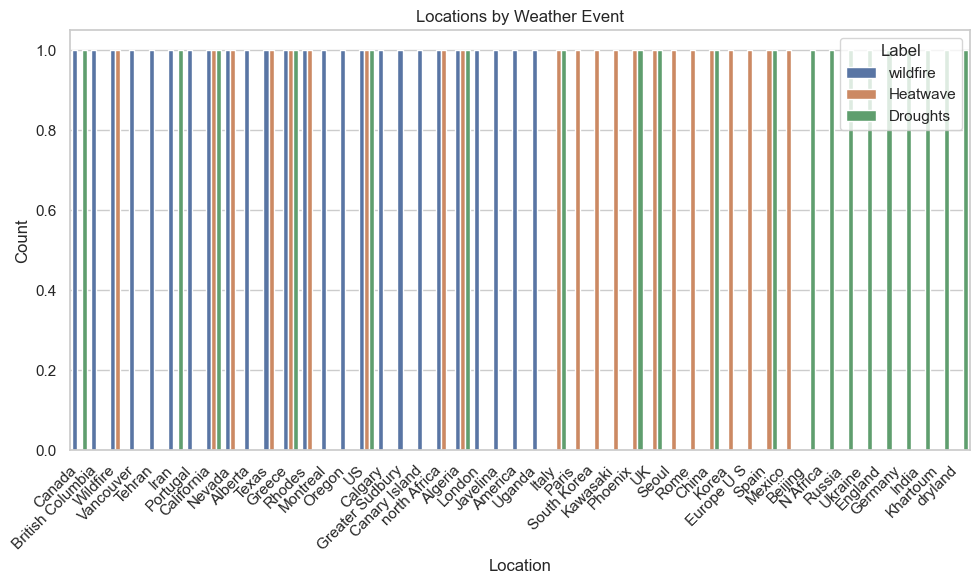

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame for plotting
plot_data = []

# Flatten the list of locations and count occurrences
for index, row in df.iterrows():
    locations = row['Locations']
    label = row['LABEL']
    for location in locations:
        plot_data.append({'Location': location, 'Count': 1, 'Label': label})

# Convert the list of dictionaries to a DataFrame
plot_df = pd.DataFrame(plot_data)

# Plot a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Count', hue='Label', data=plot_df)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Locations by Weather Event')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title='Label', loc='upper right')
plt.show()


In [76]:
# Reload dataset
dataset = pd.read_csv('severe_weather.csv')
dataset = dataset.dropna()
                           
# Preprocess the 'Headline' column and removing custome words like "nan"
dataset['df_processed'] = dataset['Headline'].apply(preprocess_text)

In [79]:
data.head()

,df_processed,LABEL
0,even full month summer much united states alre...,wildfire
1,detained italy seen scene wildfire calabria,wildfire
2,evacuation order place towns near border fires...,wildfire
3,wildfire rages near athens reuters,wildfire
4,cancel flights rhodes wildfire reuters,wildfire


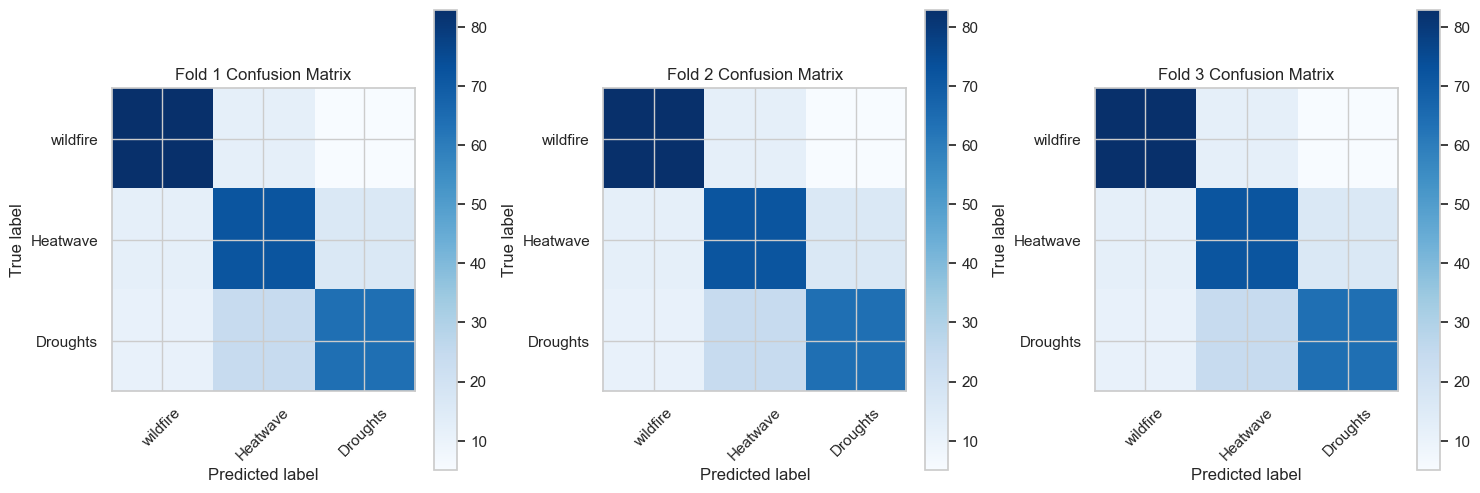

Cross-validation scores: [0.78      0.72      0.6969697]
Mean accuracy: 0.7323232323232324


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

# Load your dataset
# dataset = pd.read_csv('your_dataset.csv')

# Select the relevant columns
data = dataset[['df_processed', 'LABEL']]

# Prepare the data
X = data['df_processed']
y = data['LABEL']

# Create a CountVectorizer
vectorizer = TfidfVectorizer ()

# Transform text data into feature vectors
X_vectorized = vectorizer.fit_transform(X)

# Create a Naive Bayes classifier
naive_bayes = MultinomialNB()

# Perform cross-validation
y_pred = cross_val_predict(naive_bayes, X_vectorized, y, cv=3)

# Calculate confusion matrix for each fold
conf_matrices = []
for fold in range(3):
    conf_matrices.append(confusion_matrix(y, y_pred, labels=y.unique()))

# Plot confusion matrix for each fold
plt.figure(figsize=(15, 10))
for fold, conf_matrix in enumerate(conf_matrices):
    plt.subplot(2, 3, fold + 1)
    labels = y.unique()
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Fold {fold+1} Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.show()

# Perform cross-validation scores
cross_val_scores = cross_val_score(naive_bayes, X_vectorized, y, cv=3)

print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())


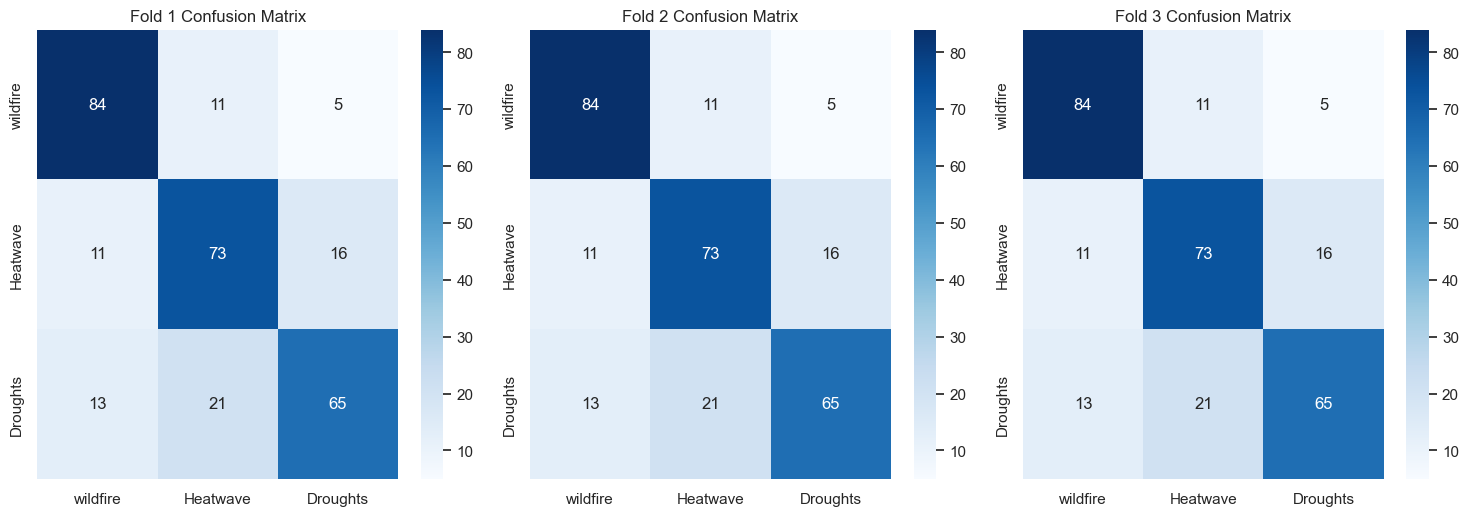

Cross-validation scores: [0.8       0.73      0.6969697]
Mean accuracy: 0.7423232323232324


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load your dataset
# dataset = pd.read_csv('your_dataset.csv')

# Select the relevant columns
data = dataset[['df_processed', 'LABEL']]

# Prepare the data
X = data['df_processed']
y = data['LABEL']

# Lemmatization setup
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization
X_lemmatized = X.apply(lemmatize_text)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform text data into feature vectors
X_vectorized = vectorizer.fit_transform(X_lemmatized)

# Create a Naive Bayes classifier
naive_bayes = MultinomialNB()

# Perform cross-validation
y_pred = cross_val_predict(naive_bayes, X_vectorized, y, cv=3)

# Calculate confusion matrix for each fold
conf_matrices = []
for fold in range(3):
    conf_matrices.append(confusion_matrix(y, y_pred, labels=y.unique()))

# # Print confusion matrix for each fold
# for fold, conf_matrix in enumerate(conf_matrices):
#     print(f"Fold {fold+1} Confusion Matrix:")
#     print(conf_matrix)

# Plot confusion matrix for each fold
plt.figure(figsize=(15, 10))
for fold, conf_matrix in enumerate(conf_matrices):
    plt.subplot(2, 3, fold + 1)
    labels = y.unique()
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"Fold {fold+1} Confusion Matrix")
plt.tight_layout()
plt.show()

# Perform cross-validation scores
cross_val_scores = cross_val_score(naive_bayes, X_vectorized, y, cv=3)

print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())


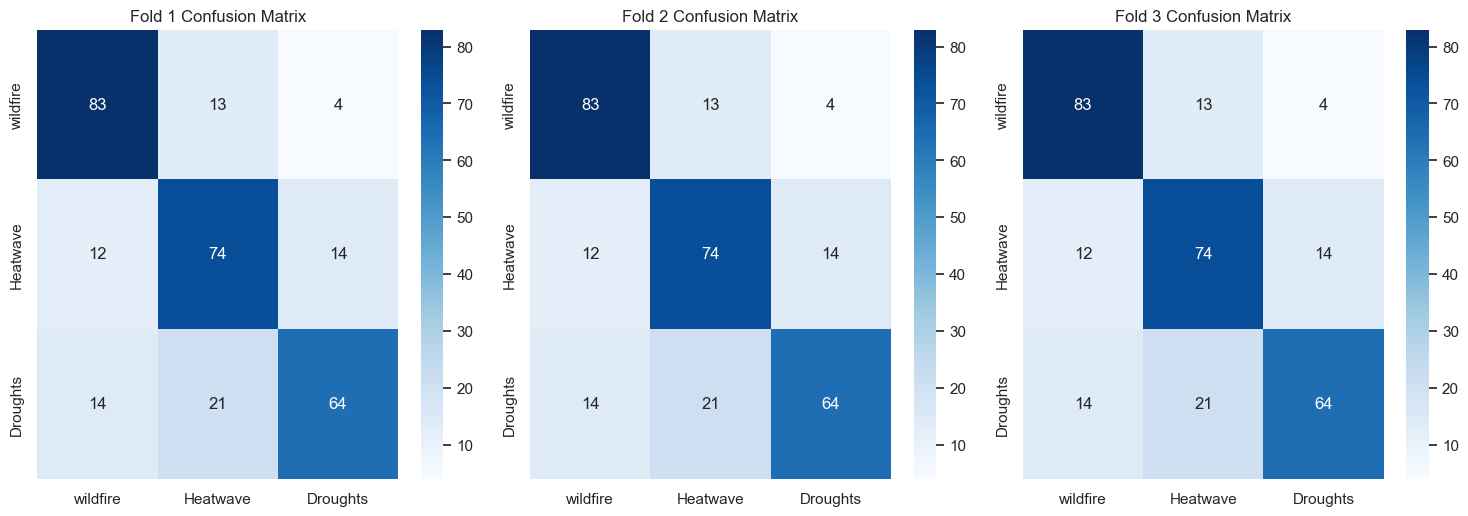

Cross-validation scores: [0.78       0.75       0.68686869]
Mean accuracy: 0.738956228956229


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Load your dataset
# dataset = pd.read_csv('your_dataset.csv')

# Select the relevant columns
data = dataset[['df_processed', 'LABEL']]

# Prepare the data
X = data['df_processed']
y = data['LABEL']

# Stemming setup
stemmer = PorterStemmer()
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming
X_stemmed = X.apply(stem_text)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform text data into feature vectors
X_vectorized = vectorizer.fit_transform(X_stemmed)

# Create a Naive Bayes classifier
naive_bayes = MultinomialNB()

# Perform cross-validation
y_pred = cross_val_predict(naive_bayes, X_vectorized, y, cv=3)

# Calculate confusion matrix for each fold
conf_matrices = []
for fold in range(3):
    conf_matrices.append(confusion_matrix(y, y_pred, labels=y.unique()))

# # Print confusion matrix for each fold
# for fold, conf_matrix in enumerate(conf_matrices):
#     print(f"Fold {fold+1} Confusion Matrix:")
#     print(conf_matrix)

# Plot confusion matrix for each fold
plt.figure(figsize=(15, 10))
for fold, conf_matrix in enumerate(conf_matrices):
    plt.subplot(2, 3, fold + 1)
    labels = y.unique()
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"Fold {fold+1} Confusion Matrix")
plt.tight_layout()
plt.show()

# Perform cross-validation scores
cross_val_scores = cross_val_score(naive_bayes, X_vectorized, y, cv=3)

print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Select the relevant columns
data = dataset[['df_processed', 'LABEL']]

# Prepare the data
X = data['df_processed']
y = data['LABEL']

# Lemmatization setup
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization
X_lemmatized = X.apply(lemmatize_text)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform text data into feature vectors
X_vectorized = vectorizer.fit_transform(X_lemmatized)

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Perform cross-validation
y_pred = cross_val_predict(decision_tree, X_vectorized, y, cv=3)

# Calculate confusion matrix for each fold
conf_matrices = []
for fold in range(3):
    conf_matrices.append(confusion_matrix(y, y_pred, labels=y.unique()))

# Print confusion matrix for each fold
for fold, conf_matrix in enumerate(conf_matrices):
    print(f"Fold {fold+1} Confusion Matrix:")
    print(conf_matrix)

# Plot confusion matrix for each fold
plt.figure(figsize=(15, 10))
for fold, conf_matrix in enumerate(conf_matrices):
    plt.subplot(2, 3, fold + 1)
    labels = y.unique()
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"Fold {fold+1} Confusion Matrix")
plt.tight_layout()
plt.show()

# Perform cross-validation scores
cross_val_scores = cross_val_score(decision_tree, X_vectorized, y, cv=3)

print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import*
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


# Select the relevant columns
data = dataset[['df_processed', 'LABEL']]

# Prepare the data
X = data['df_processed']
y = data['LABEL']

# Lemmatization setup
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization
X_lemmatized = X.apply(lemmatize_text)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform text data into feature vectors
X_vectorized = vectorizer.fit_transform(X_lemmatized)

# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Perform cross-validation
y_pred = cross_val_predict(random_forest, X_vectorized, y, cv=3)

# Calculate confusion matrix for each fold
conf_matrices = []
for fold in range(3):
    conf_matrices.append(confusion_matrix(y, y_pred, labels=y.unique()))

# Print confusion matrix for each fold
for fold, conf_matrix in enumerate(conf_matrices):
    print(f"Fold {fold+1} Confusion Matrix:")
    print(conf_matrix)

# Plot confusion matrix for each fold
plt.figure(figsize=(15, 10))
for fold, conf_matrix in enumerate(conf_matrices):
    plt.subplot(2, 3, fold + 1)
    labels = y.unique()
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"Fold {fold+1} Confusion Matrix")
plt.tight_layout()
plt.show()

# Perform cross-validation scores
cross_val_scores = cross_val_score(random_forest, X_vectorized, y, cv=3)

print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())


ImportError: cannot import name '_fit_context' from 'sklearn.base' (C:\Users\sinti\anaconda3\lib\site-packages\sklearn\base.py)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load your dataset
# dataset = pd.read_csv('your_dataset.csv')

# Select the relevant columns
data = dataset[['df_processed', 'LABEL']]

# Prepare the data
X = data['df_processed']
y = data['LABEL']

# Lemmatization setup
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization
X_lemmatized = X.apply(lemmatize_text)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform text data into feature vectors
X_vectorized = vectorizer.fit_transform(X_lemmatized)

# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Fit the classifier to the data
random_forest.fit(X_vectorized, y)

# Predict labels on the same data
y_pred = random_forest.predict(X_vectorized)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred, labels=y.unique())

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
labels = y.unique()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)


ImportError: cannot import name '_fit_context' from 'sklearn.base' (C:\Users\sinti\anaconda3\lib\site-packages\sklearn\base.py)